In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [25]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz

In [6]:
df = pd.read_csv("Pre-Processed Data.csv")

In [8]:
X = df.drop(columns = "Attrition")
y = df[["Attrition"]]

In [9]:
# Approximate DecisionTreeClassifier accuracy 
print(cross_val_score(DecisionTreeClassifier(), X, y, cv = 20).mean())

0.7821825249907441


In [19]:
depths = np.arange(10, 21)
num_leafs = np.arange(10,80,2)
samples_split= np.arange(2,10)

try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs,
                "min_samples_split": samples_split
                    }]

In [20]:
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid = try_grid, cv=10)
DTM.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17,

In [21]:
print(DTM.best_params_)
print(DTM.best_score_)

{'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_split': 2}
0.8476190476190476


In [22]:
DT = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 10, min_samples_split = 2)

In [23]:
# Approximate DecisionTreeClassifier accuracy 
print(cross_val_score(DT, X, y, cv = 20).mean())

0.8428452425027768


In [29]:
DT.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names = list(X.columns),  
                      class_names=['Left', 'Stay'],
                      filled = True, rounded=True,  
                      special_characters=True)

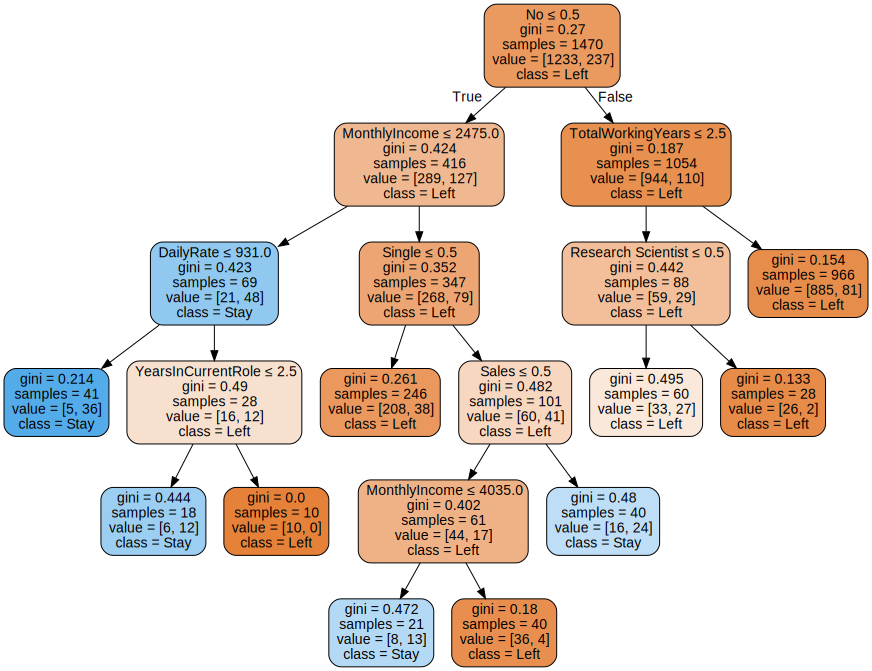

In [33]:
graph = graphviz.Source(dot_data)  
graph